# Prediction using Decision Tree Algorithm

Create the Decision Tree classifier and visualize it graphically

In [64]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn import tree
import pydotplus
from IPython.display import Image
plt.rcParams['figure.figsize'] = [15,8]

In [56]:
#load the dataset
df = pd.read_csv('Iris.csv')

#display the first five records
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#rows and columns in dataset
df.shape

(150, 6)

In [4]:
#datatypes of features
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

The features Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm are numerical variables.
The feature Species is categorical variable.     

In [5]:
#info about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#checking null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no null value.

In [7]:
#summary statistics or five point summary for numeric variables
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#summary statistics or five point summary for categorical variables
df.describe(include='object')

,Species
count,150
unique,3
top,Iris-versicolor
freq,50


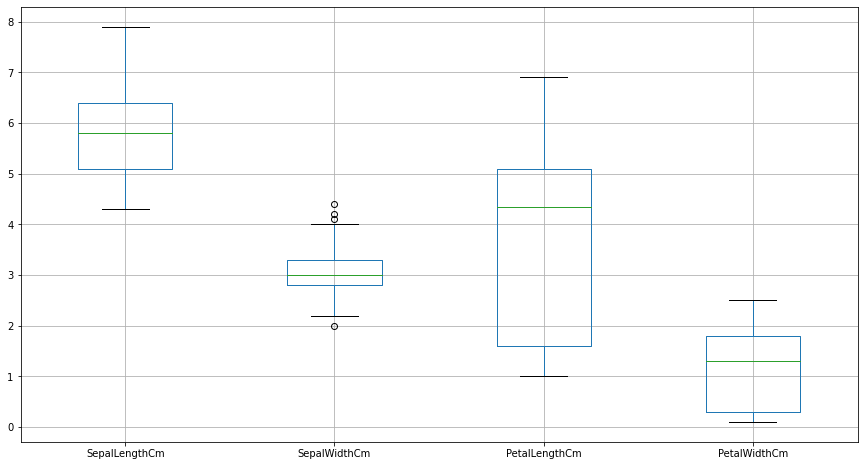

In [9]:
#checking for outliers
df.drop(['Id'],axis=1).boxplot()

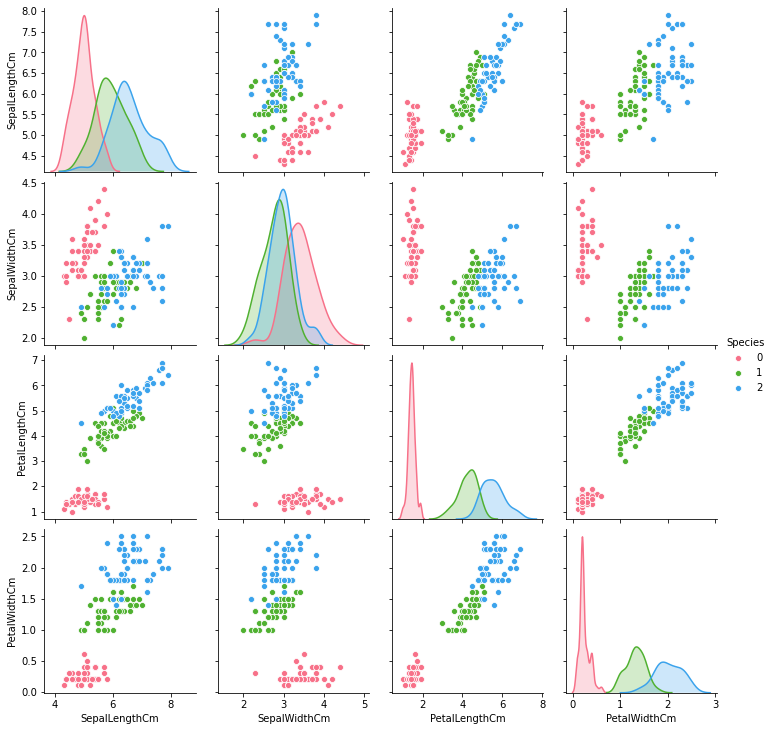

In [71]:
#visualize all the features using a pairplot
i = sns.pairplot(df, vars = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'] ,hue='Species', palette='husl')
plt.show()

The features are showing linear relationship with other features.

In [37]:
#correaltion between the variables
df.drop('Id',axis=1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


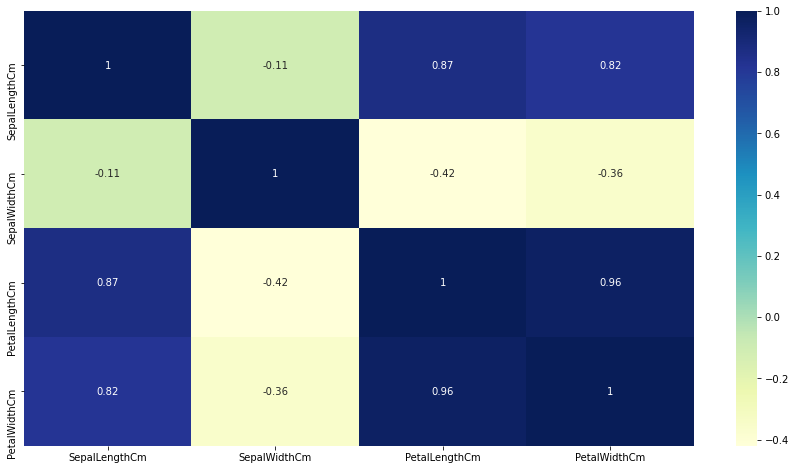

In [38]:
#correlation using heatmap
sns.heatmap(df.drop('Id',axis=1).corr(),annot=True,cmap='YlGnBu')

SepalLengthCm, PetalLengthCm, PetalWidthCm are highly correlated.

# Remove Insignificant Variables

In [12]:
df_iris = df.drop('Id',axis=1)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Distribution of Variables

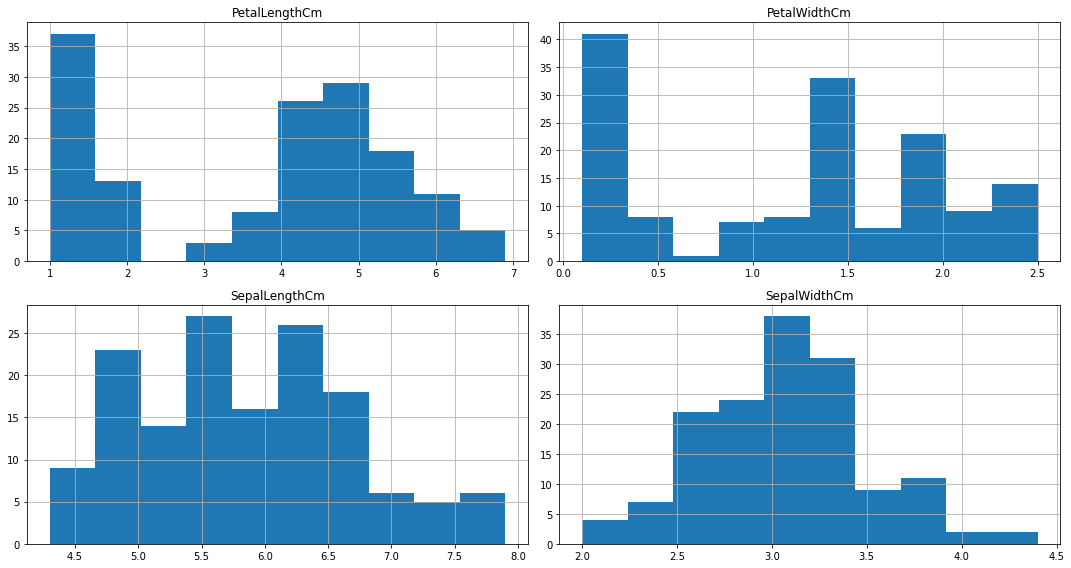

In [13]:
df_iris.drop('Species', axis = 1).hist()
plt.tight_layout()
plt.show()  

Interpretation: The above plot indicates that all the variables are near normally distributed.

In [14]:
#check skewness
df_iris.drop('Species', axis = 1).skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [ ]:
Distribution of dependent variable

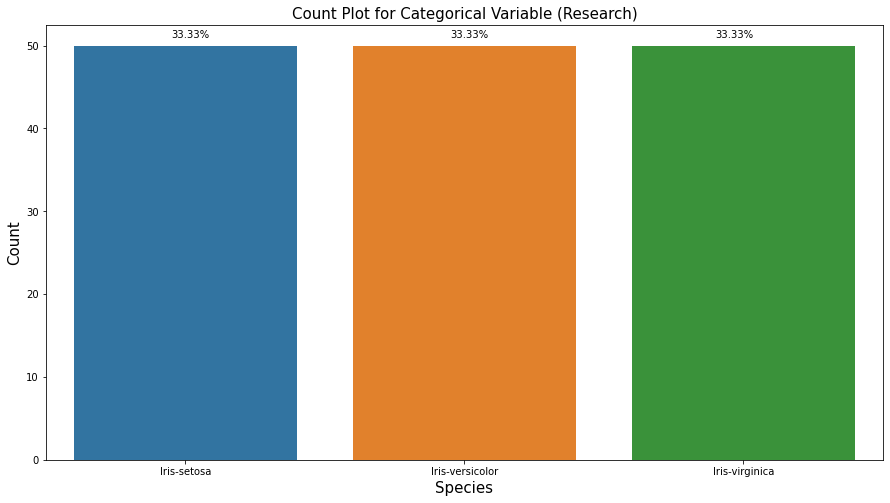

In [30]:
df_target =df_iris['Species']
sns.countplot(df_iris.Species)
plt.title('Count Plot for Categorical Variable (Research)', fontsize = 15)
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.text(x = 1.90, y = df_target.value_counts()[2] + 1, s = str(round((df_target.value_counts()[2])*100/len(df_target),2)) + '%')

plt.xlabel('Species', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

# Split the dependent and independent variable

In [57]:
#independent variable
X = df.drop(['Id','Species'],axis=1)

#target variable
y = df.Species

In [59]:
for i in range(0,len(y)):
    if y[i] == 'Iris-setosa':
        y[i] = 0
    elif y[i] == 'Iris-versicolor':
        y[i] = 1
    else:
        y[i] = 2
y = y.astype('int')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [62]:
#split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape : (105, 4)
X_test shape : (45, 4)
y_train shape : (105,)
y_test shape : (45,)


In [63]:
#Model Buildinig
decision_tree = DecisionTreeClassifier()
#fit the model
dt_model = decision_tree.fit(X_train,y_train)

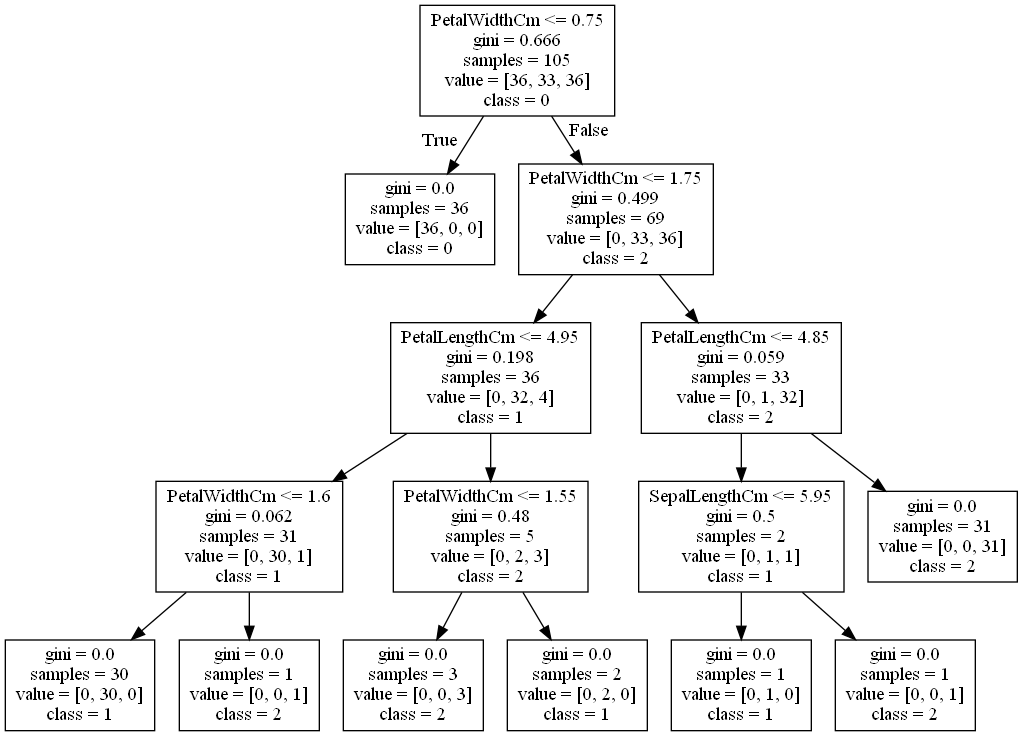

In [72]:
#plot the decision tree
labels = X_train.columns

dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["0","1","2"])  

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

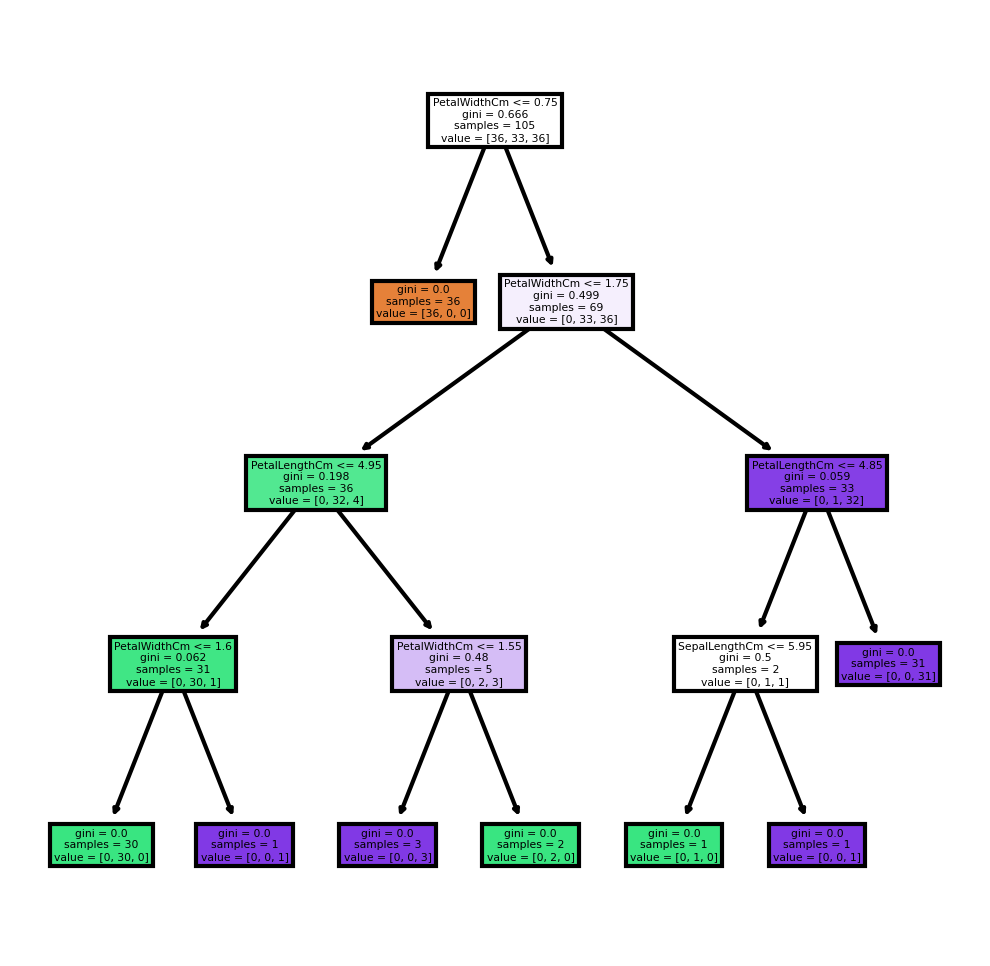

In [73]:
#other way decision tree visualization
col =['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt_model,max_depth=5, feature_names = col, filled = True);

In [69]:
#classification report
pred = dt_model.predict(X_test)
print('classification_report : \n\n',classification_report(y_test,pred))

classification_report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



The accuracy of the model is 0.98 .